## In this notebook, we will try to a simple question:
* In general, what is the most likely direction of the penatly for right and left footed players?

In [256]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [257]:
#Read the CSV file.
data = pd.read_csv('penalty_data.csv', encoding = "ISO-8859-1")

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 13 columns):
No.                        106 non-null int64
Match Week                 106 non-null int64
Date                       106 non-null object
Player                     106 non-null object
Team                       106 non-null object
Match                      106 non-null object
Time of Penalty Awarded    106 non-null object
Scored                     106 non-null object
Final Results              106 non-null object
Foot                       103 non-null object
Kick_Direction             103 non-null object
Keeper_Direction           103 non-null object
Saved                      18 non-null float64
dtypes: float64(1), int64(2), object(10)
memory usage: 10.8+ KB


We see that we have 106 entries, and 13 columns. The columns are

In [259]:
data.columns

Index(['No.', 'Match Week', 'Date', 'Player', 'Team', 'Match',
       'Time of Penalty Awarded', 'Scored', 'Final Results', 'Foot',
       'Kick_Direction', 'Keeper_Direction', 'Saved'],
      dtype='object')

For our analysis, most of these columns are irrelevant to the questions we are trying to answer. So, we will just drop them. Note that the columns Scored and Saved are dependent. In other words, having one, we can know the other. Since the Scored column has no missing data, while the Saved column has many misssing data, we will drop the Saved column. 

In [260]:
data.drop(columns = ['No.', 'Match Week', 'Date', 'Match',
       'Time of Penalty Awarded', 'Final Results','Saved'], axis = 1, inplace = True)

In [261]:
data.head(5)

,Player,Team,Scored,Foot,Kick_Direction,Keeper_Direction
0,Riyad Mahrez,Leicester,Scored,L,C,R
1,Sergio Agüero,Man City,Scored,R,L,L
2,Theo Walcott,Arsenal,Missed,R,L,L
3,Eden Hazard,Chelsea,Scored,R,C,L
4,Zlatan Ibrahimovic,Man United,Scored,R,L,R


The columns left are: 
* Player: The name of the player who shot the penalty.
* Team:   The player's team.
* Scored: If he Scored the penalty or Missed.
* Foot:   The foot he used to shoot the penalty.
* Kick_Direction: At which direction he shot the penlaty.
* Keeper_Direction: At which direction the keeper went.

Before processing, it is more convinienet to transform the categorical variable Scored to a numerical binary variable using the following function, and map operator. 

In [262]:
def to_binary(res):
    '''
    This function takes res as an argument
    
    Input: res takes on the values 'Scored' or 'Missed'
    
    Output: return 1 if res = 'Scored' or 0 otherwise.
    '''
    if res == 'Scored':
        return 1
    else:
        return 0

In [263]:
data['Scored_n'] = list(map(to_binary, data['Scored']))

In [264]:
data.head()

,Player,Team,Scored,Foot,Kick_Direction,Keeper_Direction,Scored_n
0,Riyad Mahrez,Leicester,Scored,L,C,R,1
1,Sergio Agüero,Man City,Scored,R,L,L,1
2,Theo Walcott,Arsenal,Missed,R,L,L,0
3,Eden Hazard,Chelsea,Scored,R,C,L,1
4,Zlatan Ibrahimovic,Man United,Scored,R,L,R,1


One final step before start the analysis, is to arrange the columns such that Scored is the last column.

In [265]:
cols = ['Player', 'Team', 'Foot', 'Kick_Direction', 'Keeper_Direction', 'Scored', 'Scored_n']
data = data[cols]

In [266]:
data.head()

,Player,Team,Foot,Kick_Direction,Keeper_Direction,Scored,Scored_n
0,Riyad Mahrez,Leicester,L,C,R,Scored,1
1,Sergio Agüero,Man City,R,L,L,Scored,1
2,Theo Walcott,Arsenal,R,L,L,Missed,0
3,Eden Hazard,Chelsea,R,C,L,Scored,1
4,Zlatan Ibrahimovic,Man United,R,L,R,Scored,1


## Cleaning the data

Now, let us handle the missing data.

In [267]:
data.isnull().sum()

Player              0
Team                0
Foot                3
Kick_Direction      3
Keeper_Direction    3
Scored              0
Scored_n            0
dtype: int64

We see that there are 3 missing values in the Foot, Kick_Direction, and Keeper_Direction columns. Let us try to retrieve the entire rows where these values are missing, to see if we can use other columns to fill the missing data.

In [268]:
null_data = data[data.isnull().any(axis = 1)]
null_data

,Player,Team,Foot,Kick_Direction,Keeper_Direction,Scored,Scored_n
57,Christian Benteke,Crystal Palace,NaN,NaN,NaN,Missed,0
76,Ashley Barnes,Burnley,NaN,NaN,NaN,Scored,1
102,Riyad Mahrez,Leicester,NaN,NaN,NaN,Missed,0


We see that the three missing values happen in three rows. Without having the Kick_Direction or Keeper_Direction with the Scored variable, we cannot know what values are these missing values. So, we will just drop them.

In [269]:
data.dropna(how = 'any', axis = 0, inplace = True)

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 105
Data columns (total 7 columns):
Player              103 non-null object
Team                103 non-null object
Foot                103 non-null object
Kick_Direction      103 non-null object
Keeper_Direction    103 non-null object
Scored              103 non-null object
Scored_n            103 non-null int64
dtypes: int64(1), object(6)
memory usage: 6.4+ KB


In [271]:
data.isnull().sum()

Player              0
Team                0
Foot                0
Kick_Direction      0
Keeper_Direction    0
Scored              0
Scored_n            0
dtype: int64

In [272]:
null_data = data[data.isnull().any(axis = 1)]
null_data

,Player,Team,Foot,Kick_Direction,Keeper_Direction,Scored,Scored_n


We see now that the number of entries has been reduced to 103, and there are no missing data.

## Exploratory Data Analysis (EDA)

At the begining, let us see what is the probability of scoring a goal in a penalty shoot. To do this, we need to find

$$\text{P}[\text{scoring a penatly}]=\frac{\text{# of penalties scores}}{\text{total # of penalties}}$$

In [273]:
P_score = len(data[data['Scored_n'] == 1])/len(data['Scored_n'])
print(f'The probability of scoring a penalty is {P_score}')

The probability of scoring a penalty is 0.7766990291262136


We see that, it is more likely to score a penatly than missing it, with a probability close to 78%. Now let us see some absolute numbers.

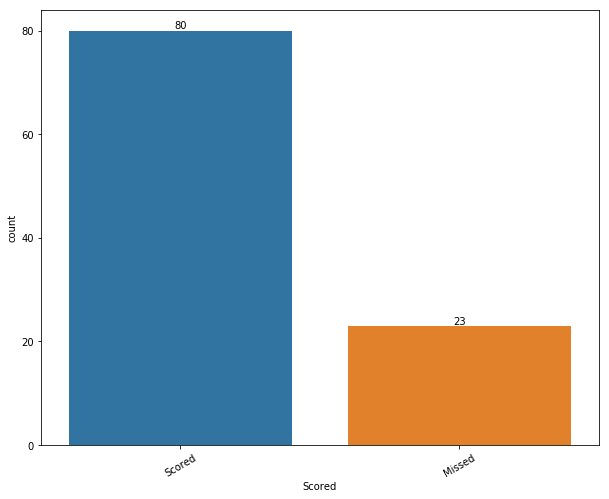

In [274]:
plt.figure(figsize = (10, 8))
plt.xticks(rotation = 30)
plt.yticks([0, 20, 40, 60, 80, 100])
g = sns.countplot(x = 'Scored', data = data)
for rect in g.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

In [275]:
trace1 = go.Bar(x = ['Scored', 'Missed'], y = data['Scored'].value_counts())

data1 = [trace1]

layout = go.Layout(title = 'Bar Chart of Penlaties')

fig = go.Figure(data = data1, layout = layout)

plot(fig)

'file://C:\\Users\\Saed\\Desktop\\Penatly Kicks in the Premier League 20162017\\temp-plot.html'

So, in abolute numbers, we see that 80 penatlies were scored out of the total 103 penatlies, which gives $80/103 \simeq 78\%$.  

Next we will investigate where left and right footed players shoot there penalties. 

Text(0.5,1,'Directions of Left Footed Players')

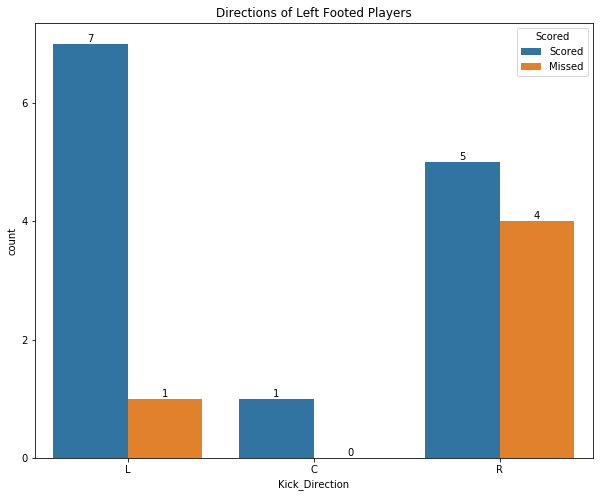

In [276]:
plt.figure(figsize = (10, 8))
plt.yticks([0, 2, 4, 6, 8, 10])
g= sns.countplot(x = 'Kick_Direction', data = data[data['Foot'] == 'L'], order = ['L', 'C', 'R'], hue = 'Scored')
for rect in g.patches:
    if rect.get_height() not in range(1,10):
        height = 0
    else:
        height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % (height), ha='center', va='bottom')
plt.title('Directions of Left Footed Players')

Text(0.5,1,'Directions of Right Footed Players')

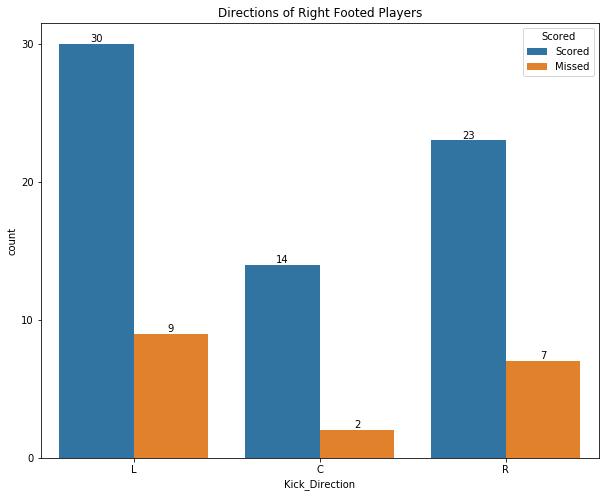

In [277]:
plt.figure(figsize = (10, 8))
plt.yticks([0, 10, 20, 30, 40])
g= sns.countplot(x = 'Kick_Direction', data = data[data['Foot'] == 'R'], order = ['L', 'C', 'R'], hue = 'Scored')
for rect in g.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.title('Directions of Right Footed Players')

In [278]:
data[data['Foot'] == 'L']['Kick_Direction'].value_counts()

R    9
L    8
C    1
Name: Kick_Direction, dtype: int64

In [279]:
data[data['Foot'] == 'L']['Kick_Direction'].value_counts(normalize = True)

R    0.500000
L    0.444444
C    0.055556
Name: Kick_Direction, dtype: float64

In [280]:
data[data['Foot'] == 'R']['Kick_Direction'].value_counts()

L    39
R    30
C    16
Name: Kick_Direction, dtype: int64

In [281]:
data[data['Foot'] == 'R']['Kick_Direction'].value_counts(normalize = True)

L    0.458824
R    0.352941
C    0.188235
Name: Kick_Direction, dtype: float64

from the above count plots and numbers we make the following remarks:
* It is a rare event that a player, regardless if he is left or right footed, to shoot the penalty in the center. This suggests that the goal keeper has a better chance if he goes to the right or to the left, than remaining in the center.
* A player is more likely to shoot the penalty to the opposite of his strong foot, i.e., if he is a left footed, he is more likely to shoot to the right, and vice versa. This suggests that the goal keeper, in absence of any other information, has a better chance in saving the penalty is he moves to the opposite direction of the strong foot of the penalty shooter. 